Total agents: 242
Active agents: 242
Agents with emissions: 154


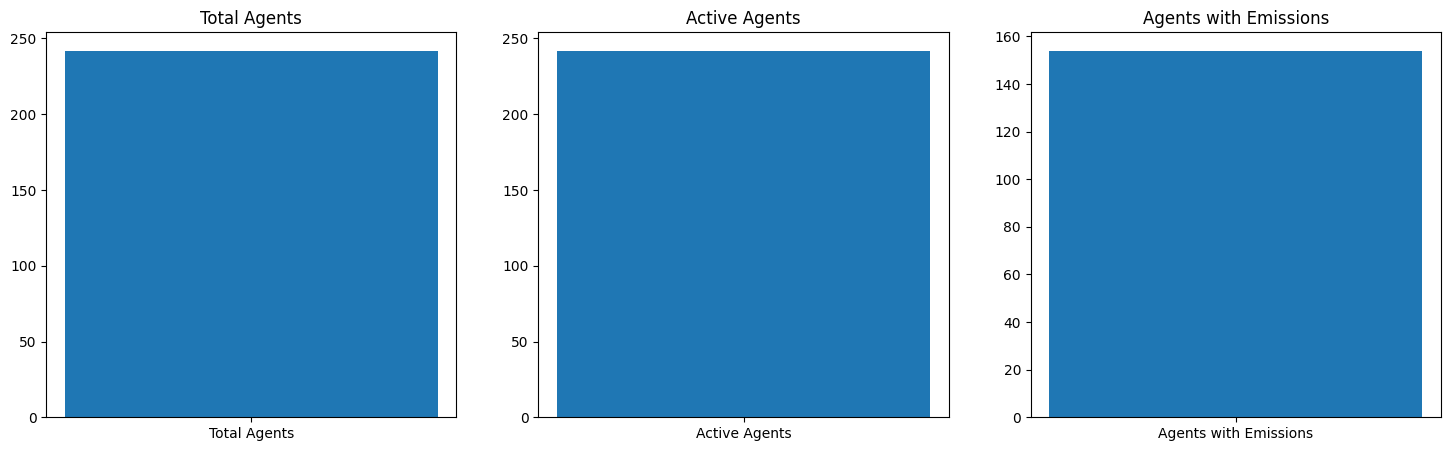

In [3]:
import sys
import json
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


# Load query results from JSON file
data_path = Path('./data/agents.json')
with open(data_path, 'r') as f:
    agents = json.load(f)

# Convert JSON data to DataFrame
agents_df = pd.DataFrame(agents)

# Visualize data
# Count of agents
total_agents = len(agents_df)
print(f"Total agents: {total_agents}")

# Count of active agents
active_agents = agents_df[agents_df['IsActive'] == True]
num_active_agents = len(active_agents)
print(f"Active agents: {num_active_agents}")

# Count of agents with emissions
agents_with_emissions = agents_df[agents_df['Emissions'] > 0]
num_agents_with_emissions = len(agents_with_emissions)
print(f"Agents with emissions: {num_agents_with_emissions}")

# Plotting the data
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Total agents
ax[0].bar(['Total Agents'], [total_agents])
ax[0].set_title('Total Agents')

# Active agents
ax[1].bar(['Active Agents'], [num_active_agents])
ax[1].set_title('Active Agents')

# Agents with emissions
ax[2].bar(['Agents with Emissions'], [num_agents_with_emissions])
ax[2].set_title('Agents with Emissions')

plt.show()
